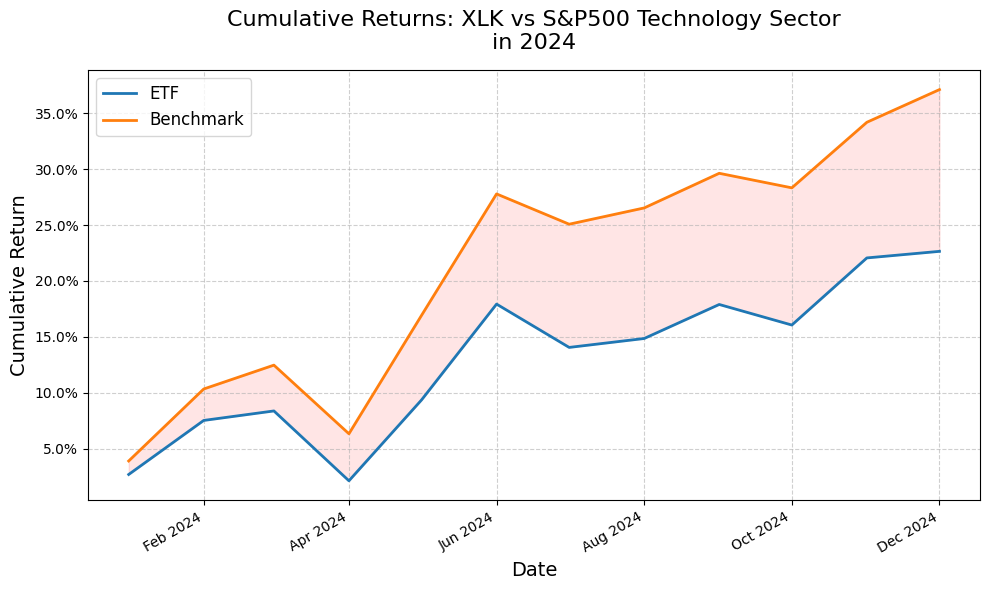

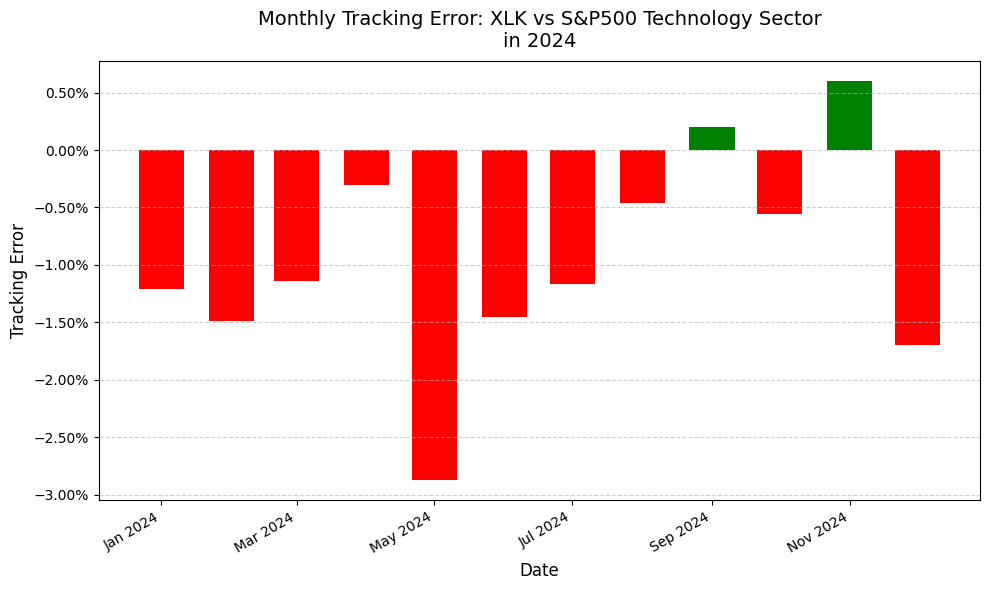

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter

# 1. Load & index
xlk = pd.read_excel(
    'xlk_data.xlsx',
    parse_dates=['Date'],
    index_col='Date'
)

# 2. Define fixed window: Jan 1 2024 to last available
start = pd.Timestamp('2024-01-01')
end   = xlk.index.max()

# 3. Slice returns
rets = xlk.loc[start:end, ['ETF_Return', 'Benchmark_Return']].dropna()

# 4. Cumulative returns
cum = (1 + rets).cumprod() - 1
cum_etf   = cum['ETF_Return']
cum_bench = cum['Benchmark_Return']

# ——— Plot 1: cumulative returns + shading ———
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(cum_etf.index, cum_etf,   linewidth=2, label='ETF')
ax.plot(cum_bench.index, cum_bench, linewidth=2, label='Benchmark')

ax.fill_between(
    cum_etf.index, cum_etf, cum_bench,
    where=cum_etf>=cum_bench, color='green', alpha=0.1, interpolate=True
)
ax.fill_between(
    cum_etf.index, cum_etf, cum_bench,
    where=cum_etf< cum_bench, color='red',   alpha=0.1, interpolate=True
)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_title('Cumulative Returns: XLK vs S&P500 Technology Sector\nin 2024', fontsize=16, pad=15)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Cumulative Return', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


# 5. Slice tracking error
te = xlk.loc[start:end, 'Tracking_Error'].dropna()

# 6. Colors for TE bars
colors = ['green' if x>=0 else 'red' for x in te]

# ——— Plot 2: monthly tracking error bar chart ———
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(te.index, te, color=colors, width=20)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_title('Monthly Tracking Error: XLK vs S&P500 Technology Sector\nin 2024', fontsize=14, pad=10)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Tracking Error', fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.6)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()
